# **Creating a Custom Music Dataset using 'spotipy'**

### **Part 1: Setup**

**Spotipy** is a Python library that allows easy access to music data available for the Spotify Web API, which gives close to full access to all music data on Spotify.

To start, please see the README for setup. If you would like to follow along, use the blank outline notebook.



Once we have a Spotify account, we have to go to [spotify.developer.com](https://www.developer.spotify.com)

When we go there, we should see this pop up. Accept the terms and continue
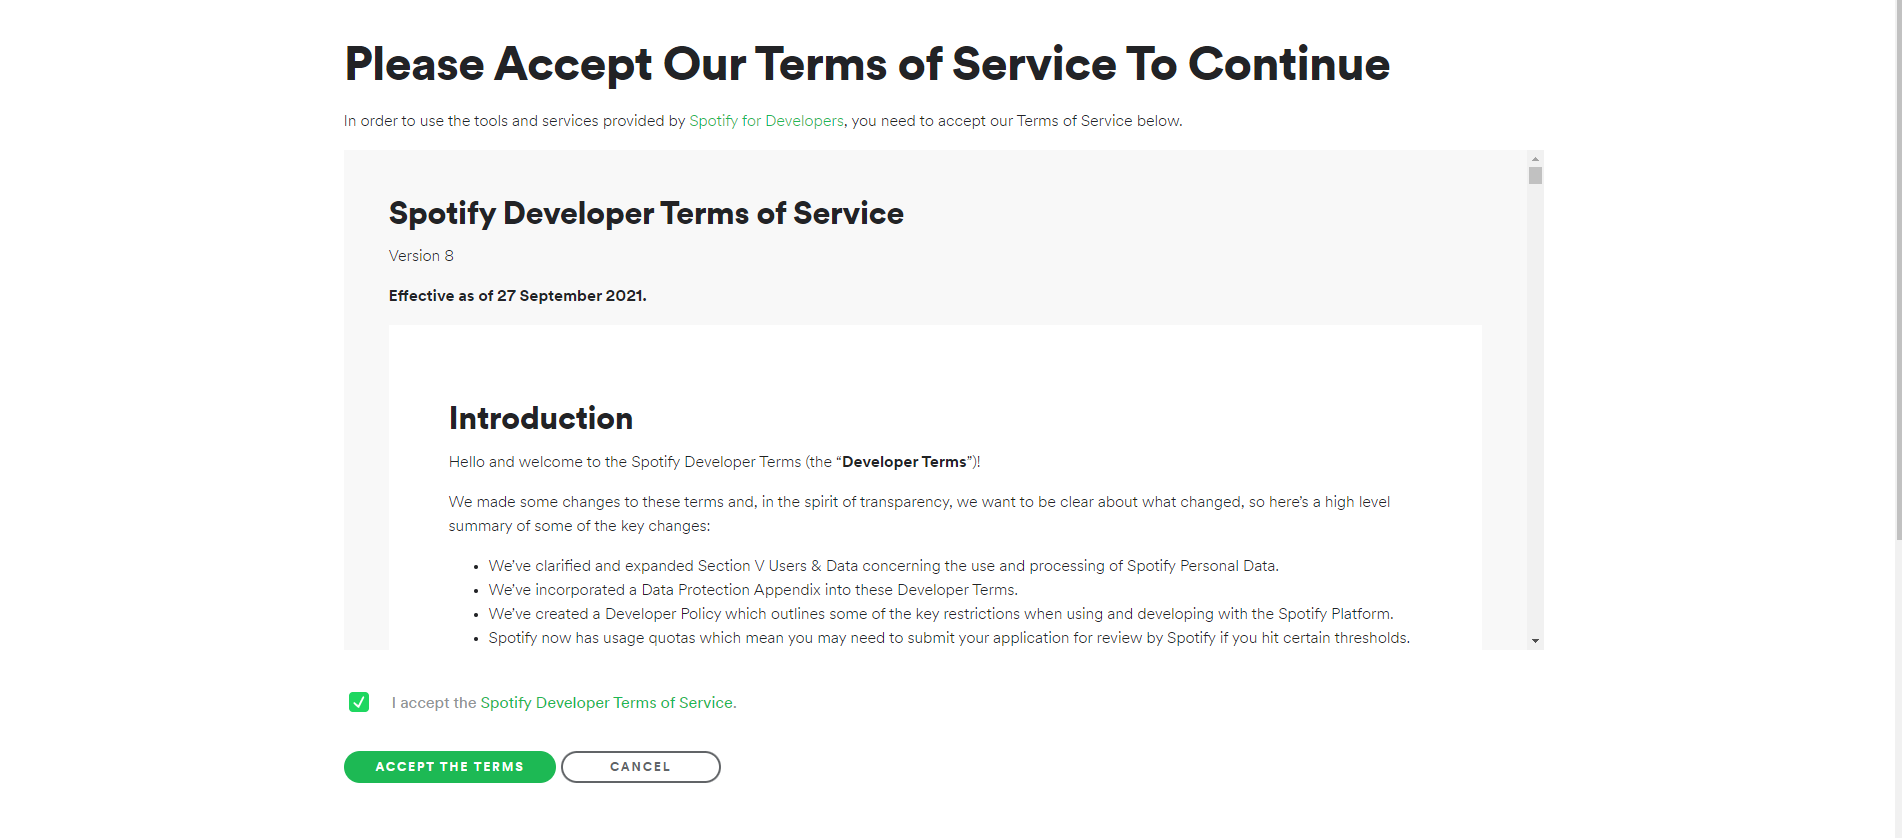


After, we should be at the Developer Dashboard here.
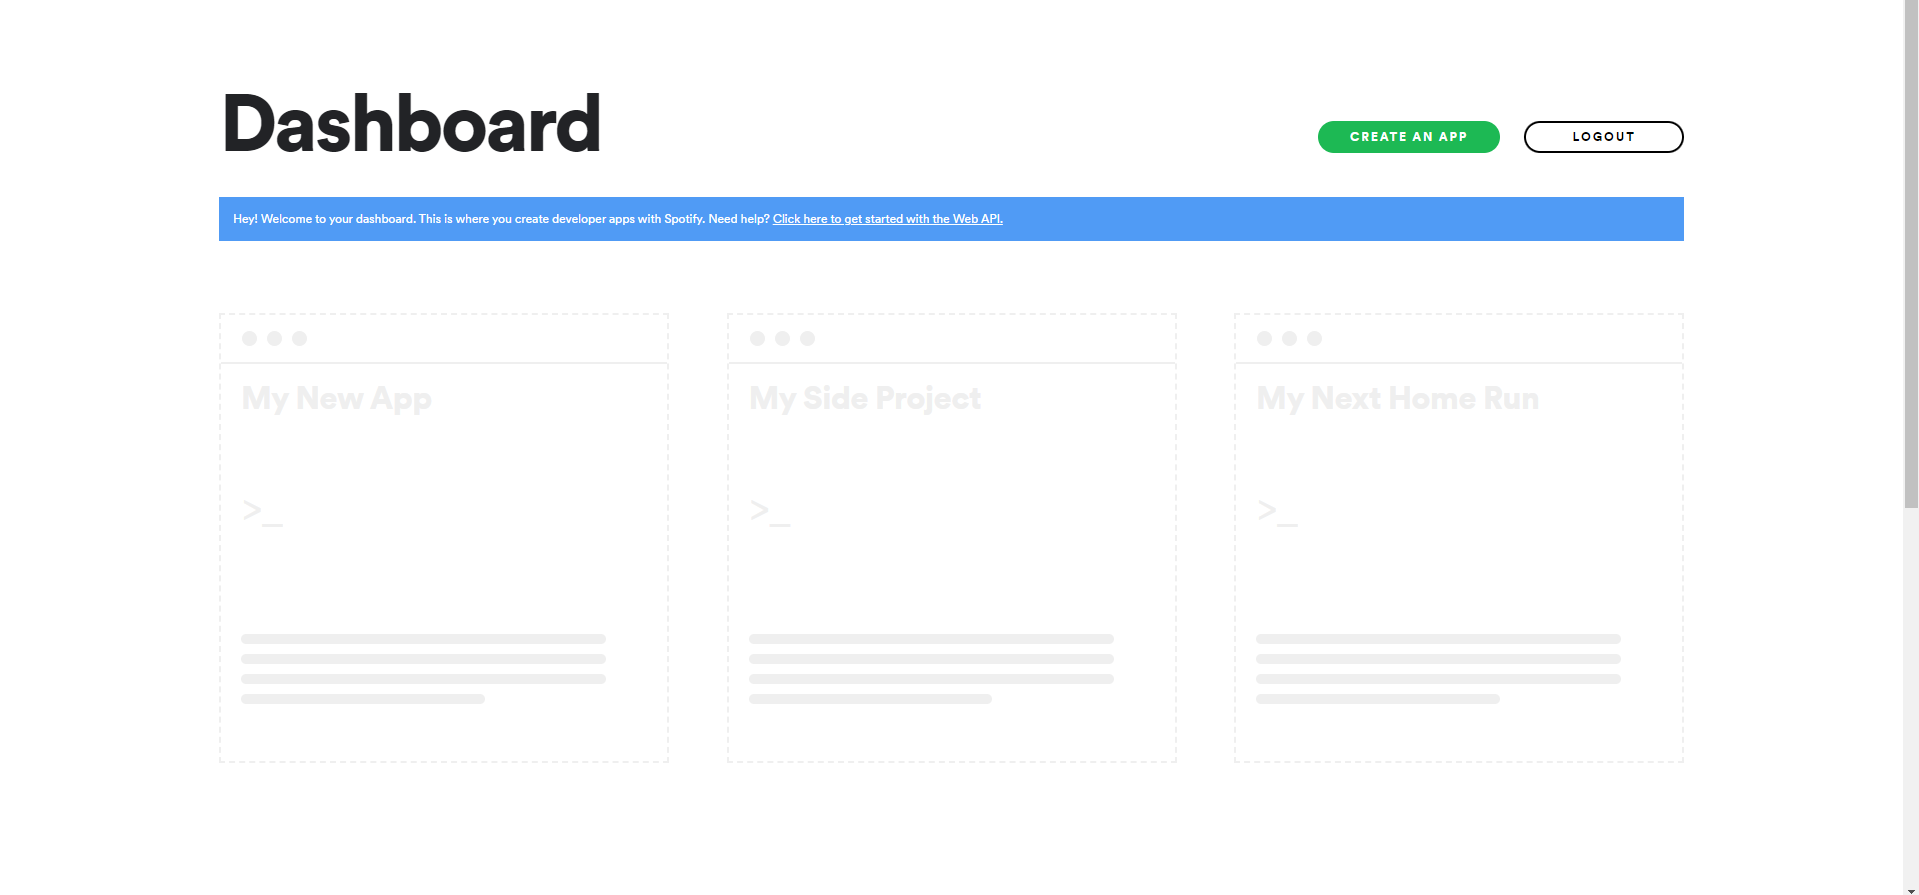

Click **CREATE AN APP**, add any name/description, and click **CREATE**

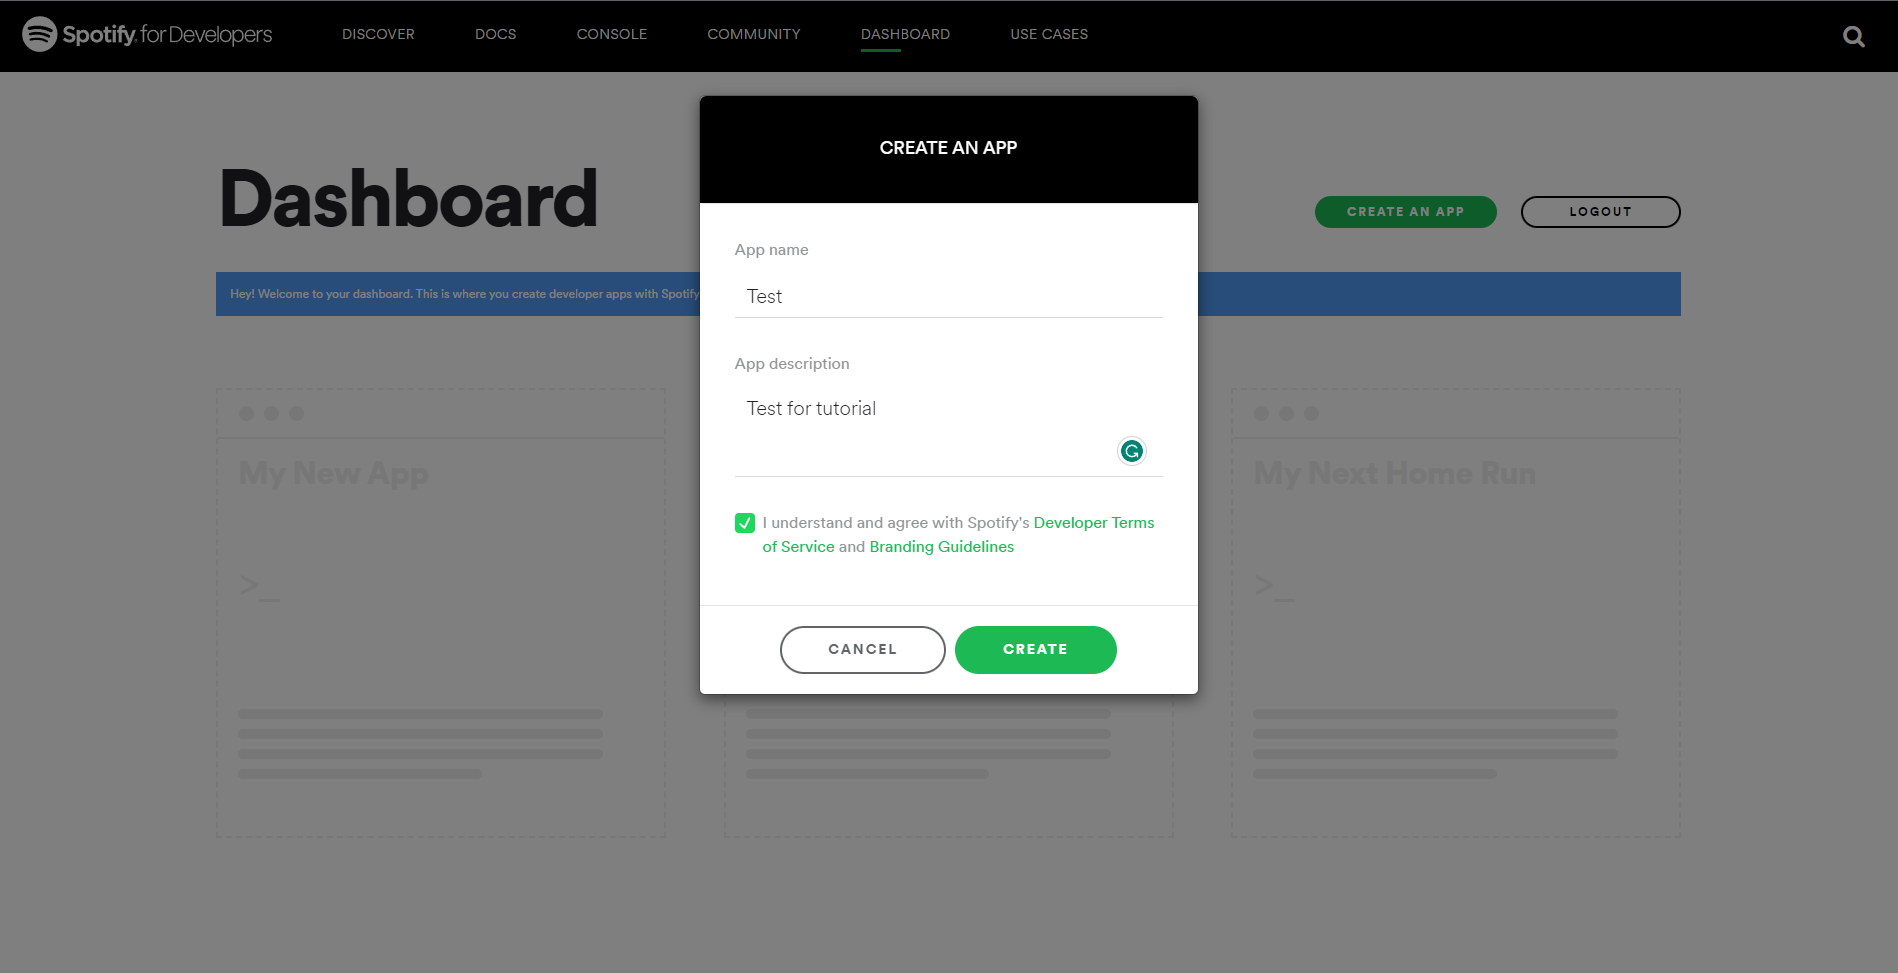

Now, we are in the dashboard for our app. This is where we can find our Client ID and Client Secret which will allow us to make API calls. 

Have this page up for the next part of the tutorial so we can copy and paste these values.

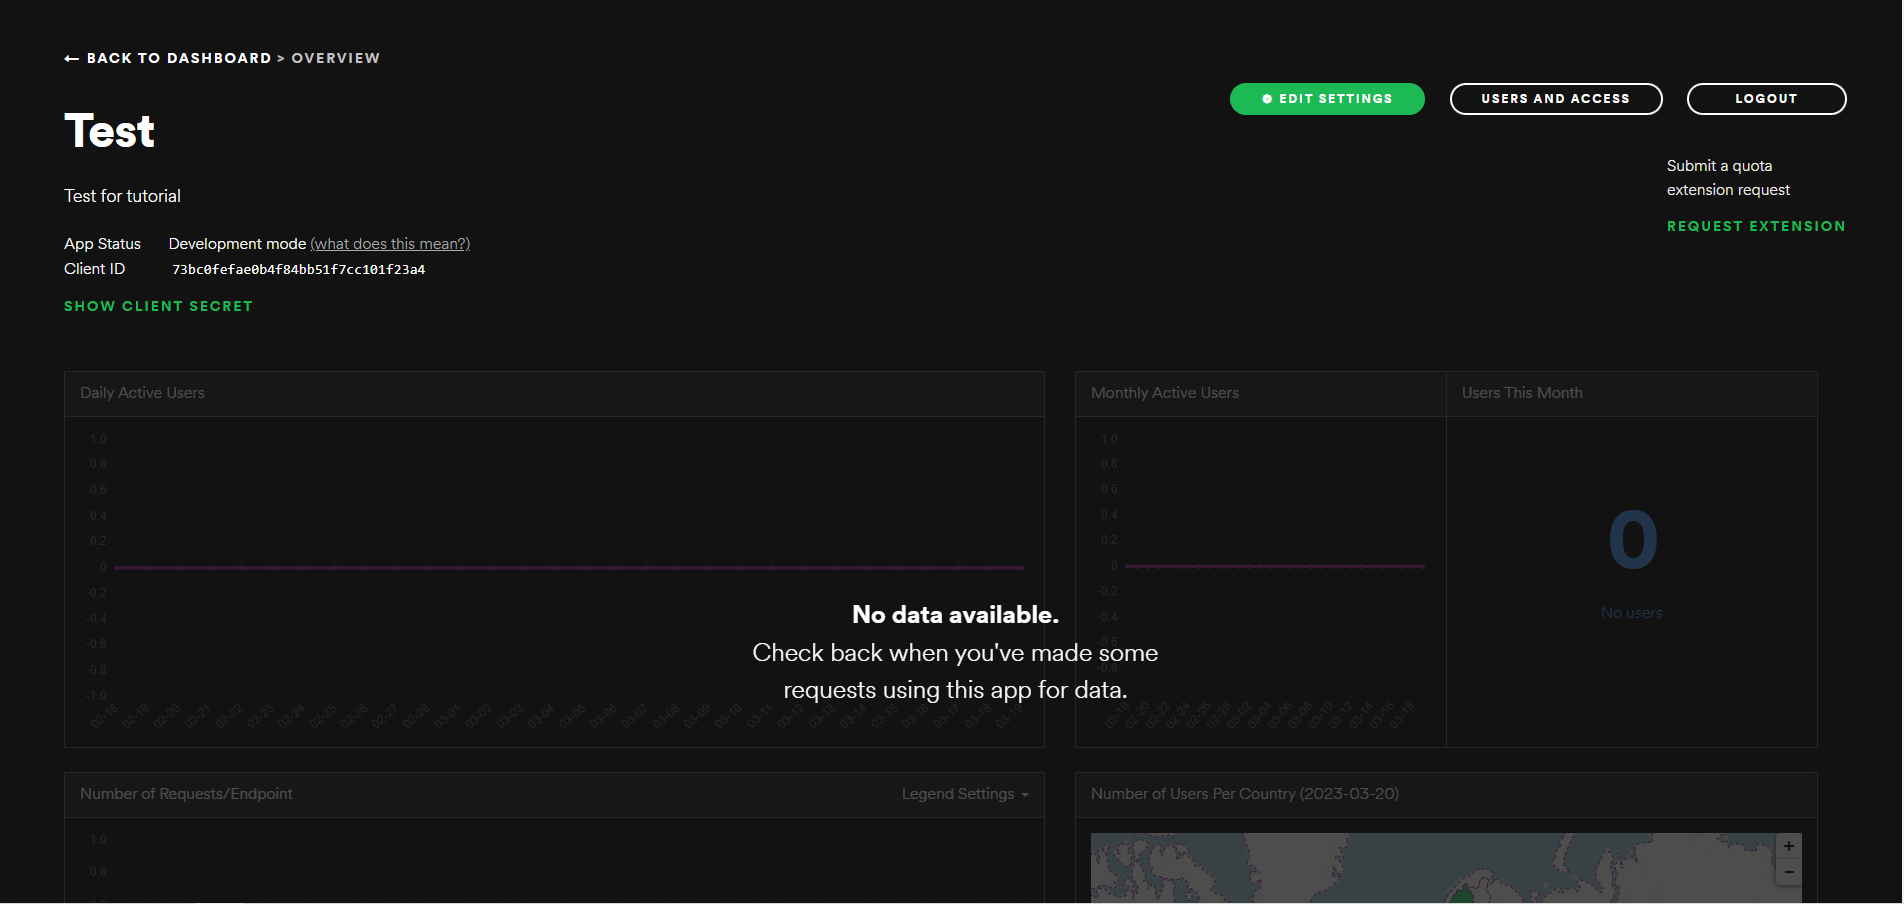

### **Part 2: Spotipy Setup**

If you have not already, you will need to pip install spotipy to do the rest of the tutorial

Once it is installed, we can start implementing the library

We will start by importing the following libraries

In [97]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

Next, we will initialize our id and client secret to get access to the API

**Note:** My credentials are stored using a json object, you can simply type the string of your id and secret here

In [98]:
import json

with open("credentials.json") as infile:
        auth = json.load(infile)
        client_id = auth["client_id"]
        client_secret = auth["client_secret"]

spotify = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials(client_id=client_id, client_secret=client_secret))

Now that we have created our spotify object, we can start creating our dataset

### **Part 3: Creating a Dataset**

If we go back to the Spotify developer website, and click Docs -> Web API -> Reference, we can see all of the different actions we can do

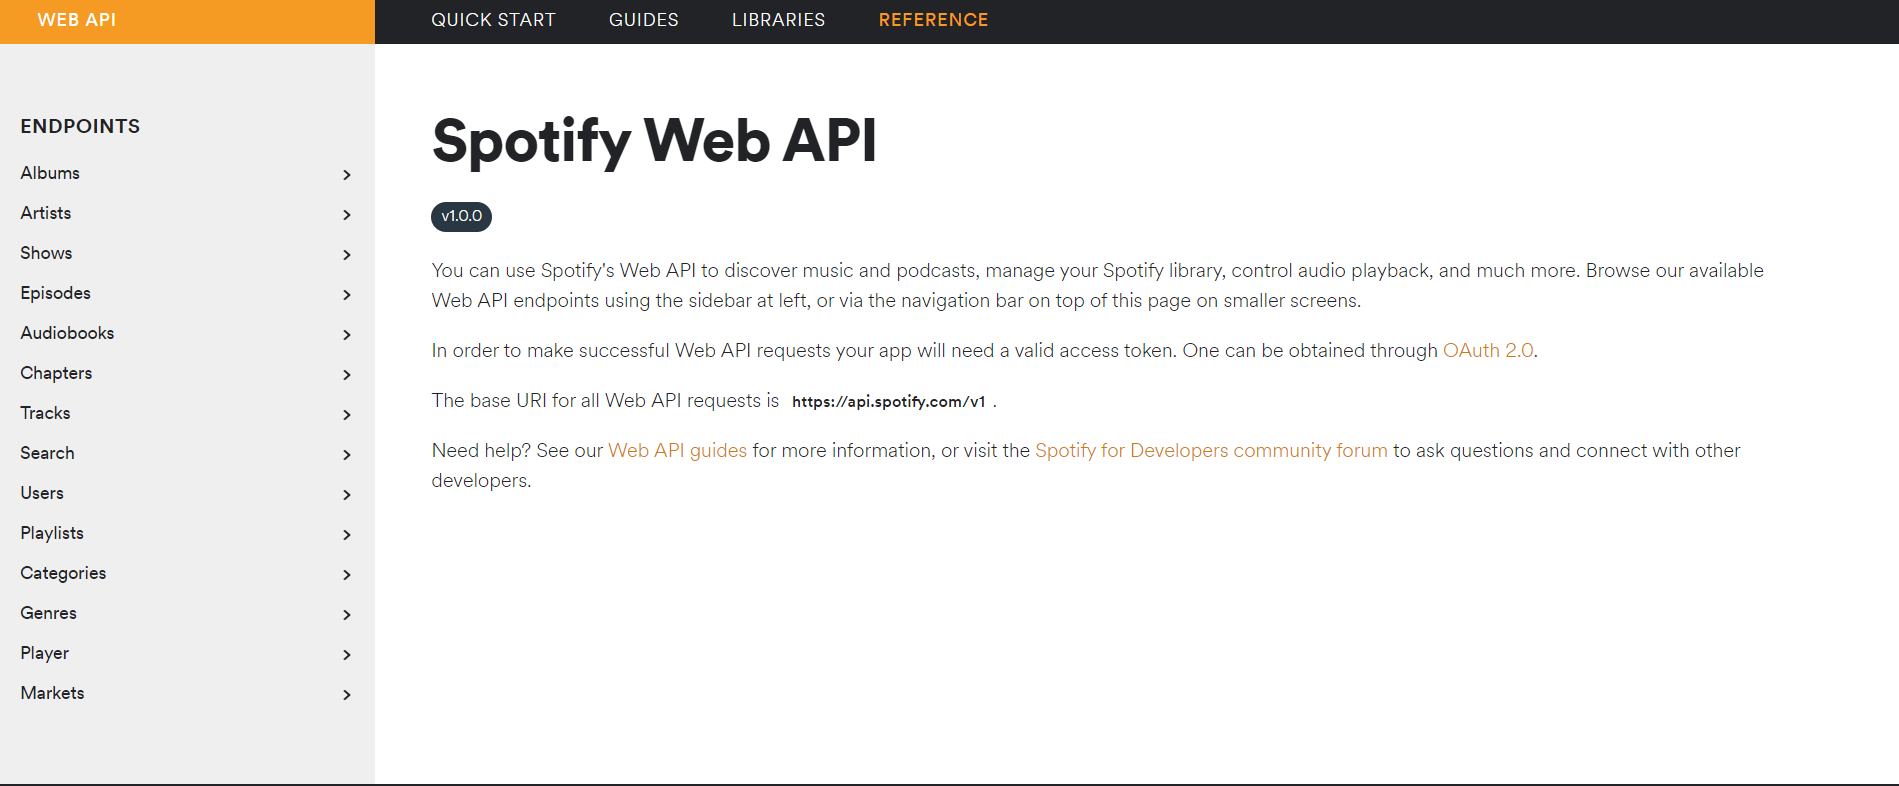

If we expand on tracks, for example, we see all of the different Get requests we can do to obtain data

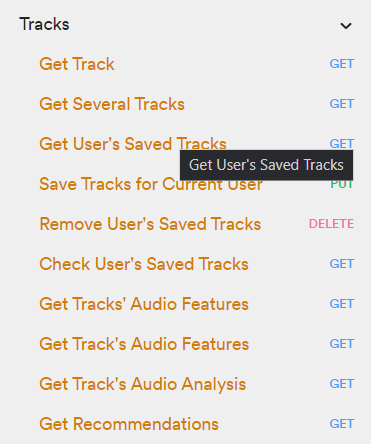

These get requests can be important to finding specific data about a song, but to acquire large amounts of data, we want to use the **Search** endpoint

The Search endpoint allows us to query over all of the data, making it extremely useful for creating a dataset. You can query over just about anything over the data, but the most important are: Track, Artist, Genre, Year, and Album

The best way to understand this is with a quick example

### **Example #1: Artist Data**

Let's say we want to obtain up-to-date artist data. The first thing we should do is see what attributes are linked artist data by using the Web-API Reference. [Linked Here](https://developer.spotify.com/documentation/web-api/reference/#/operations/get-an-artist)

As we can see, there are quite a few attributes we can select from. However, for this example, we will take the following attributes:
* Name
* ID
* URL
* Total Followers
* Popularity

To eventually create this data into a structured dataset, we will first want to instantiate some arrays to store the values into

In [99]:
artist_name = []
artist_id = []
artist_url = []
artist_followers = []
artist_popularity = []

Now that we have instiantiated these arrays, we can now query over the dataset.

**Note:** You can only search up to 50 items at once, so we will have to step by 50 when we are searching

For this example, we will collect 100 pop artists from the year 2023

In [100]:
for i in range(0, 100, 50):
    artist_results = spotify.search(q='genre:pop year:2023', type='artist', limit=50, offset=i)
    for artist in artist_results["artists"]["items"]:
        artist_name.append(artist["name"])
        artist_id.append(artist["id"])
        artist_url.append(artist["uri"])
        artist_followers.append(artist["followers"]["total"])
        artist_popularity.append(artist["popularity"])

The easiest way to think about the querying is that the q= value is like a **WHERE** statement in a SQL query and the type= is similar to a **SELECT** statement

The offset=i allows it to move on to the next 50 values without repeating. I haven't tested not using it, but every example I've seen using the search endpoint uses it.


Now that we have our data, let's store it into a DataFrame and do some basic EDA

In [101]:
import pandas as pd

artist_df = pd.DataFrame({"name": artist_name, 
                          "id": artist_id,
                          "url": artist_url,
                          "total_followers": artist_followers,
                          "popularity": artist_popularity})


artist_df

,name,id,url,total_followers,popularity
0,Taylor Swift,06HL4z0CvFAxyc27GXpf02,spotify:artist:06HL4z0CvFAxyc27GXpf02,70091476,100
1,Drake,3TVXtAsR1Inumwj472S9r4,spotify:artist:3TVXtAsR1Inumwj472S9r4,73195416,98
2,The Weeknd,1Xyo4u8uXC1ZmMpatF05PJ,spotify:artist:1Xyo4u8uXC1ZmMpatF05PJ,61057516,99
3,SZA,7tYKF4w9nC0nq9CsPZTHyP,spotify:artist:7tYKF4w9nC0nq9CsPZTHyP,11408939,95
4,Rihanna,5pKCCKE2ajJHZ9KAiaK11H,spotify:artist:5pKCCKE2ajJHZ9KAiaK11H,53810737,94
...,...,...,...,...,...
95,beabadoobee,35l9BRT7MXmM8bv2WDQiyB,spotify:artist:35l9BRT7MXmM8bv2WDQiyB,1834839,79
96,Diplo,5fMUXHkw8R8eOP2RNVYEZX,spotify:artist:5fMUXHkw8R8eOP2RNVYEZX,2537766,80
97,Tate McRae,45dkTj5sMRSjrmBSBeiHym,spotify:artist:45dkTj5sMRSjrmBSBeiHym,3439383,83
98,Clairo,3l0CmX0FuQjFxr8SK7Vqag,spotify:artist:3l0CmX0FuQjFxr8SK7Vqag,3784453,78


In [102]:
print("Average Popularity: ", artist_df["popularity"].mean())
print("Average Followers: ", artist_df["total_followers"].mean())

Average Popularity:  85.53
Average Followers:  19154498.49


(array([ 9., 13., 19., 23., 10.,  8., 11.,  4.,  0.,  3.]),
 array([ 77. ,  79.3,  81.6,  83.9,  86.2,  88.5,  90.8,  93.1,  95.4,
         97.7, 100. ]),
 <BarContainer object of 10 artists>)

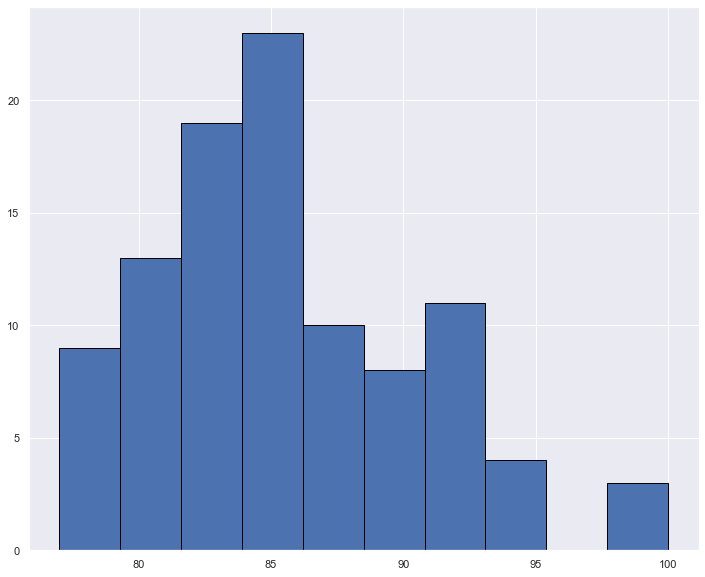

In [103]:
import matplotlib.pyplot as plt

plt.hist(artist_df["popularity"], bins=10, edgecolor="black")

On a small scale of only 100 artists, the data is not extremely reliable as it seems that spotify seems to favor popular artists and therefore the results are skewed. In the future, we could workaround this by specifically querying for less popular artists as well to ensure a better spread of the data

### **Example #2: Track Data**

Here, we are going to create a more full dataset of pop songs from the year 2022 and do some more EDA on it.

We will use 2022 data for this example because there is less errors and some tracks when queried with 2023 will come up with a 0 popularity score.

First, we are going to want to instantiate the values we want to collect

In [104]:
artist_name = []
track_name = []
track_popularity = []
artist_id = []
track_id = []

Then we will search for these tracks

In [105]:
for i in range(0,100,50):
    track_results = spotify.search(q='year:2022 genre:pop', type='track', limit=50, offset=i)
    for track in track_results['tracks']['items']:
        artist_name.append(track['artists'][0]['name'])
        artist_id.append(track['artists'][0]['id'])
        track_name.append(track['name'])
        track_id.append(track['id'])
        track_popularity.append(track['popularity'])

Add these values to a DataFrame

In [106]:
track_df = pd.DataFrame({'artist_name' : artist_name,
                        'track_name' : track_name, 
                        'track_id' : track_id, 
                        'track_popularity' : track_popularity, 
                        'artist_id' : artist_id})
track_df

,artist_name,track_name,track_id,track_popularity,artist_id
0,SZA,Kill Bill,1Qrg8KqiBpW07V7PNxwwwL,81,7tYKF4w9nC0nq9CsPZTHyP
1,SZA,Kill Bill,3OHfY25tqY28d16oZczHc8,81,7tYKF4w9nC0nq9CsPZTHyP
2,Drake,Rich Flex,1bDbXMyjaUIooNwFE9wn0N,81,3TVXtAsR1Inumwj472S9r4
3,d4vd,Romantic Homicide,1xK59OXxi2TAAAbmZK0kBL,81,5y8tKLUfMvliMe8IKamR32
4,SZA,Snooze,4iZ4pt7kvcaH6Yo8UoZ4s2,81,7tYKF4w9nC0nq9CsPZTHyP
...,...,...,...,...,...
95,Isabel LaRosa,i'm yours,37vVp2sWHuuIBOSl1NswP6,81,5arKwJZEvT5uKq4o0JfqR4
96,SZA,Far,74NI58MQexwZjNu1Gu6GjT,81,7tYKF4w9nC0nq9CsPZTHyP
97,The Kid LAROI,Thousand Miles,1r8ZCjfrQxoy2wVaBUbpwg,81,2tIP7SsRs7vjIcLrU85W8J
98,Kelsea Ballerini,IF YOU GO DOWN (I'M GOIN' DOWN TOO),1jX9wlAgVkAl0fCZqkCI73,81,3RqBeV12Tt7A8xH3zBDDUF


Next, we are going to store the audio features/information to a new dataframe.

We are going to do this by using the track ID

**Note:** There will likely be a lot of warnings that pop up, they should not have any impact on the data

In [112]:
track_features = []
for id in track_df["track_id"]:
    audio_features = spotify.audio_features(id)
    track_features.append(audio_features)
    
tf_df = pd.DataFrame(columns = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature'])

for item in track_features:
  for feat in item:
    tf_df = tf_df.append(feat, ignore_index=True)

tf_df

C:\Users\foxis\AppData\Local\Temp\ipykernel_2616\2670345256.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tf_df = tf_df.append(feat, ignore_index=True);
C:\Users\foxis\AppData\Local\Temp\ipykernel_2616\2670345256.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tf_df = tf_df.append(feat, ignore_index=True);
C:\Users\foxis\AppData\Local\Temp\ipykernel_2616\2670345256.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tf_df = tf_df.append(feat, ignore_index=True);
C:\Users\foxis\AppData\Local\Temp\ipykernel_2616\2670345256.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tf_df = tf_df.append(feat, ignore_index=True);
C:\U

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.644,0.735,8,-5.747,1,0.0391,0.0521,0.144,0.161,0.418,88.98,audio_features,1Qrg8KqiBpW07V7PNxwwwL,spotify:track:1Qrg8KqiBpW07V7PNxwwwL,https://api.spotify.com/v1/tracks/1Qrg8KqiBpW0...,https://api.spotify.com/v1/audio-analysis/1Qrg...,153947,4
1,0.644,0.728,8,-5.75,1,0.0351,0.0543,0.169,0.161,0.43,88.993,audio_features,3OHfY25tqY28d16oZczHc8,spotify:track:3OHfY25tqY28d16oZczHc8,https://api.spotify.com/v1/tracks/3OHfY25tqY28...,https://api.spotify.com/v1/audio-analysis/3OHf...,153947,4
2,0.561,0.52,11,-9.342,0,0.244,0.0503,0.000002,0.355,0.424,153.15,audio_features,1bDbXMyjaUIooNwFE9wn0N,spotify:track:1bDbXMyjaUIooNwFE9wn0N,https://api.spotify.com/v1/tracks/1bDbXMyjaUIo...,https://api.spotify.com/v1/audio-analysis/1bDb...,239360,3
3,0.571,0.544,6,-10.613,1,0.0299,0.453,0.00805,0.322,0.216,132.052,audio_features,1xK59OXxi2TAAAbmZK0kBL,spotify:track:1xK59OXxi2TAAAbmZK0kBL,https://api.spotify.com/v1/tracks/1xK59OXxi2TA...,https://api.spotify.com/v1/audio-analysis/1xK5...,132631,4
4,0.559,0.551,5,-7.231,1,0.132,0.141,0,0.11,0.392,143.008,audio_features,4iZ4pt7kvcaH6Yo8UoZ4s2,spotify:track:4iZ4pt7kvcaH6Yo8UoZ4s2,https://api.spotify.com/v1/tracks/4iZ4pt7kvcaH...,https://api.spotify.com/v1/audio-analysis/4iZ4...,201800,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.398,0.705,5,-7.07,0,0.0756,0.204,0.000051,0.443,0.635,111.487,audio_features,37vVp2sWHuuIBOSl1NswP6,spotify:track:37vVp2sWHuuIBOSl1NswP6,https://api.spotify.com/v1/tracks/37vVp2sWHuuI...,https://api.spotify.com/v1/audio-analysis/37vV...,145668,4
96,0.612,0.549,2,-7.401,1,0.0833,0.672,0.000203,0.163,0.477,115.915,audio_features,74NI58MQexwZjNu1Gu6GjT,spotify:track:74NI58MQexwZjNu1Gu6GjT,https://api.spotify.com/v1/tracks/74NI58MQexwZ...,https://api.spotify.com/v1/audio-analysis/74NI...,180680,4
97,0.376,0.657,7,-4.658,1,0.0768,0.0858,0,0.0884,0.203,80.565,audio_features,1r8ZCjfrQxoy2wVaBUbpwg,spotify:track:1r8ZCjfrQxoy2wVaBUbpwg,https://api.spotify.com/v1/tracks/1r8ZCjfrQxoy...,https://api.spotify.com/v1/audio-analysis/1r8Z...,164782,4
98,0.676,0.856,11,-4.35,1,0.0393,0.454,0,0.141,0.965,144.092,audio_features,1jX9wlAgVkAl0fCZqkCI73,spotify:track:1jX9wlAgVkAl0fCZqkCI73,https://api.spotify.com/v1/tracks/1jX9wlAgVkAl...,https://api.spotify.com/v1/audio-analysis/1jX9...,166036,4


If we are going to just be analysing the numbers of this data, we are not going to need some of these attributes, so we will remove them below

In [115]:
cols_to_drop = ['key','mode','type', 'uri','track_href','analysis_url']
tf_df = tf_df.drop(columns=cols_to_drop)

Lastly, to clean the data, we are going to have to change the following columns' types so they will be usable

In [116]:
tf_df['duration_ms'] = pd.to_numeric(tf_df['duration_ms'])
tf_df["danceability"] = pd.to_numeric(tf_df["danceability"])
tf_df["energy"] = pd.to_numeric(tf_df["energy"])
tf_df["loudness"] = pd.to_numeric(tf_df["loudness"])
tf_df["speechiness"] = pd.to_numeric(tf_df["speechiness"])
tf_df["acousticness"] = pd.to_numeric(tf_df["acousticness"])
tf_df["liveness"] = pd.to_numeric(tf_df["liveness"])
tf_df["valence"] = pd.to_numeric(tf_df["valence"])
tf_df["tempo"] = pd.to_numeric(tf_df["tempo"])
tf_df['instrumentalness'] = pd.to_numeric(tf_df['instrumentalness'])
tf_df['time_signature'] = tf_df['time_signature'].astype("category")

In [117]:
tf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   danceability      100 non-null    float64 
 1   energy            100 non-null    float64 
 2   loudness          100 non-null    float64 
 3   speechiness       100 non-null    float64 
 4   acousticness      100 non-null    float64 
 5   instrumentalness  100 non-null    float64 
 6   liveness          100 non-null    float64 
 7   valence           100 non-null    float64 
 8   tempo             100 non-null    float64 
 9   id                100 non-null    object  
 10  duration_ms       100 non-null    int64   
 11  time_signature    100 non-null    category
dtypes: category(1), float64(9), int64(1), object(1)
memory usage: 9.0+ KB


Now that the data is cleaned, we can create a heatmap to show correlation between all of the attributes

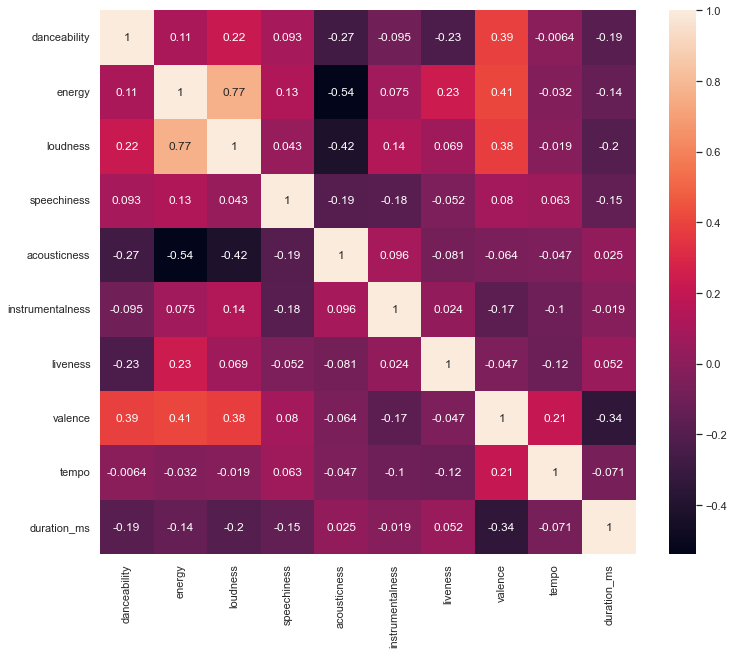

In [124]:
import seaborn as sn

sn.set(rc = {'figure.figsize':(12,10)})
sn.heatmap(tf_df.corr(), annot=True)
plt.show()